In [ ]:
import os, shutil
import matplotlib.pyplot as plt
import cv2

from keras import layers
from keras import models, optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
petsdata_dir = '/content/drive/MyDrive/учеба/dataanal/pictures/petsdata'
cats_train_dir = '/content/drive/MyDrive/учеба/dataanal/pictures/petsdata/train/cats'
dogs_train_dir = '/content/drive/MyDrive/учеба/dataanal/pictures/petsdata/train/dogs'
cats_test_dir = '/content/drive/MyDrive/учеба/dataanal/pictures/petsdata/test/cats'
dogs_test_dir = '/content/drive/MyDrive/учеба/dataanal/pictures/petsdata/test/dogs'
cats_validation_dir = '/content/drive/MyDrive/учеба/dataanal/pictures/petsdata/validation/cats'
dogs_validation_dir = '/content/drive/MyDrive/учеба/dataanal/pictures/petsdata/validation/dogs'

In [ ]:
print("total training cat images :", len(os.listdir(cats_train_dir)))
print("total training dog images :", len(os.listdir(dogs_train_dir)))
print("total validation cat images :", len(os.listdir(cats_validation_dir)))
print("total validation dog images :", len(os.listdir(dogs_validation_dir)))
print("total test cat images :", len(os.listdir(cats_test_dir)))
print("total test dog images :", len(os.listdir(dogs_test_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
total test cat images : 500
total test dog images : 500


In [ ]:
img = cv2.imread(cats_train_dir + '/' + os.listdir(cats_train_dir)[0])
img.shape

(500, 489, 3)

In [ ]:
# Масштабируем изображения с коэффициентом в 1/255

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = '/content/drive/MyDrive/учеба/dataanal/pictures/petsdata/train'
test_dir = '/content/drive/MyDrive/учеба/dataanal/pictures/petsdata/test'
validation_dir = '/content/drive/MyDrive/учеба/dataanal/pictures/petsdata/validation'

In [ ]:
train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        target_size=(150,150),
                        batch_size=20,
                        class_mode='binary' 
                        )

Found 2000 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150,150),
                        batch_size=20,
                        class_mode='binary' 
                        )

Found 1000 images belonging to 2 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                       input_shape=(150,150, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError


In [ ]:
#проверка повреждены ли картинки
# первоначалшьно был поврежден тренировочный кот 666
path = Path(cats_train_dir).rglob("*.jpg")
for img_p in path:
    try:
      
        img = PIL.Image.open(img_p)
     
    except PIL.UnidentifiedImageError:
            print(img_p)

In [ ]:
path = Path(dogs_train_dir).rglob("*.jpg")
for img_p in path:
    try:
      
        img = PIL.Image.open(img_p)
      
    except PIL.UnidentifiedImageError:
            print(img_p)

In [ ]:
path = Path(cats_validation_dir).rglob("*.jpg")
for img_p in path:
    try:
      
        img = PIL.Image.open(img_p)
      
    except PIL.UnidentifiedImageError:
            print(img_p)

In [ ]:
path = Path(dogs_validation_dir).rglob("*.jpg")
for img_p in path:
    try:
      
        img = PIL.Image.open(img_p)
      
    except PIL.UnidentifiedImageError:
            print(img_p)

In [ ]:
path = Path(cats_test_dir).rglob("*.jpg")
for img_p in path:
    try:
      
        img = PIL.Image.open(img_p)
      
    except PIL.UnidentifiedImageError:
            print(img_p)

In [ ]:
path = Path(dogs_test_dir).rglob("*.jpg")
for img_p in path:
    try:
      
        img = PIL.Image.open(img_p)
      
    except PIL.UnidentifiedImageError:
            print(img_p)

In [ ]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30, 
            validation_data=validation_generator,
            validation_steps=50
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 100s 997ms/step - loss: 0.6113 - accuracy: 0.6685 - val_loss: 0.5715 - val_accuracy: 0.6850
Epoch 2/30
100/100 [==============================] - 101s 1s/step - loss: 0.5640 - accuracy: 0.7165 - val_loss: 0.5924 - val_accuracy: 0.6750
Epoch 3/30
100/100 [==============================] - 101s 1s/step - loss: 0.5170 - accuracy: 0.7500 - val_loss: 0.5665 - val_accuracy: 0.7125
Epoch 4/30
100/100 [==============================] - 100s 1s/step - loss: 0.4685 - accuracy: 0.7860 - val_loss: 0.6025 - val_accuracy: 0.7025
Epoch 5/30
100/100 [==============================] - 101s 1s/step - loss: 0.4163 - accuracy: 0.8025 - val_loss: 0.6731 - val_accuracy: 0.7325
Epoch 6/30
100/100 [==============================] - 100s 1s/step - loss: 0.3567 - accuracy: 0.8365 - val_loss: 0.6401 - val_accuracy: 0.7250
Epoch 7/30
100/100 [==============================] - 101s 1s/step - loss: 0.3003 - accuracy: 0.8695 - val_loss: 0.7764 - val_accuracy: 0.7

In [ ]:
model.save('/content/drive/MyDrive/учеба/dataanal/pictures/petsdata/seqmodel_small.h5')

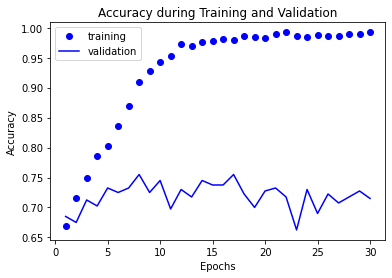

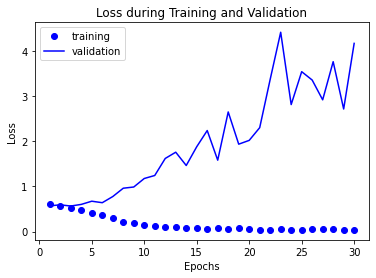

In [ ]:
# оценим модель
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='training')
plt.plot(epochs, val_acc, 'b', label='validation')
plt.title('Accuracy during Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training')
plt.plot(epochs, val_loss, 'b', label='validation')
plt.title('Loss during Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Модель заметно переобучена

Попробуем улучшить ситуацию

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2, 
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        target_size=(150,150),
                        batch_size=32,
                        class_mode='binary' 
                        )

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150,150),
                        batch_size=32,
                        class_mode='binary' 
                        )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3,3), activation='relu',
                       input_shape=(150,150, 3)))
model2.add(layers.MaxPool2D((2,2)))
model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.MaxPool2D((2,2)))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPool2D((2,2)))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPool2D((2,2)))

model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), 
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
history = model2.fit_generator(
            train_generator,
            epochs=100, 
            validation_data=validation_generator,
)

model2.save('/content/drive/MyDrive/учеба/dataanal/pictures/petsdata/seqmodel2_small.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
63/63 [==============================] - 405s 6s/step - loss: 0.6939 - accuracy: 0.5060 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 121s 2s/step - loss: 0.6873 - accuracy: 0.5515 - val_loss: 0.6732 - val_accuracy: 0.5960
Epoch 3/100
63/63 [==============================] - 121s 2s/step - loss: 0.6741 - accuracy: 0.5805 - val_loss: 0.7227 - val_accuracy: 0.5040
Epoch 4/100
63/63 [==============================] - 122s 2s/step - loss: 0.6599 - accuracy: 0.5880 - val_loss: 0.6383 - val_accuracy: 0.6260
Epoch 5/100
63/63 [==============================] - 123s 2s/step - loss: 0.6537 - accuracy: 0.6030 - val_loss: 0.6364 - val_accuracy: 0.6270
Epoch 6/100
63/63 [==============================] - 122s 2s/step - loss: 0.6466 - accuracy: 0.6115 - val_loss: 0.6148 - val_accuracy: 0.6570
Epoch 7/100
63/63 [==============================] - 124s 2s/step - loss: 0.6342 - accuracy: 0.6330 - val_loss: 0.6065 - val_accuracy: 0.6720
Epoch 

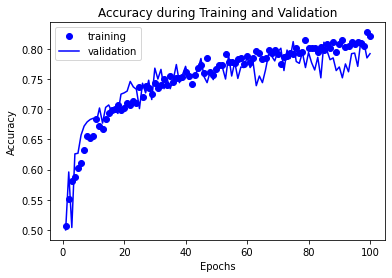

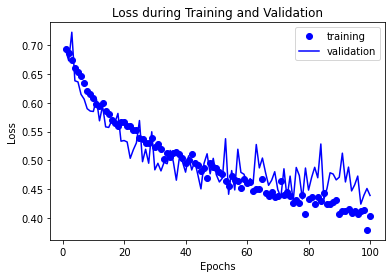

In [ ]:
# оценим вторую модель
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='training')
plt.plot(epochs, val_acc, 'b', label='validation')
plt.title('Accuracy during Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training')
plt.plot(epochs, val_loss, 'b', label='validation')
plt.title('Loss during Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Вторая модель явно демонстрирует лучшие результаты